<a href="https://colab.research.google.com/github/EWG656012/github-slideshow/blob/master/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85%20%D1%86%D0%B8%D1%84%D1%80%20%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [17]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11501568/11490434 [==============================] - 0s 0us/step


In [18]:
n = 253
print(x_train_org.shape)
print(x_train_org[n])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  96  96  96  96  96
   96  24   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  68 190 253 251 251 251 251
  253 205 111   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  48 111  64 236 251 253 251 251 172 251
  253 251 251 110   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  96 248 236 251 251 189 168  31  12  31
   91 236 251 244  83   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  36 114 172  94  94   0   0   0   0   0
    0  91 251 251 193   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

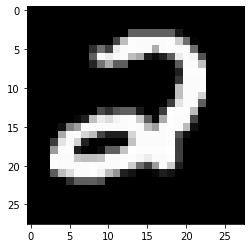

In [19]:
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) #Отрисовка картинки
plt.show() # Вывод картинки

In [20]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [21]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [22]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [23]:
print(y_train[n]) #Выводим пример одного выходного вектора

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [25]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy') # Компилируем модель
print(model.summary()) #Вывод структуры модели


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 9s 19ms/step - loss: 0.2055
Epoch 2/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0754
Epoch 3/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0465
Epoch 4/15
469/469 [==============================] - 13s 28ms/step - loss: 0.0342
Epoch 5/15
469/469 [==============================] - 16s 35ms/step - loss: 0.0267
Epoch 6/15
469/469 [==============================] - 14s 29ms/step - loss: 0.0210
Epoch 7/15
469/469 [==============================] - 8s 18ms/step - loss: 0.0182
Epoch 8/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0164
Epoch 9/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0145
Epoch 10/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0116
Epoch 11/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0160
Epoch 12/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0132
Epoch 13/1

In [27]:
#Веса нейронной сети
W1 = model.get_weights()[0]
b1 = model.get_weights()[1]
W2 = model.get_weights()[2]
b2 = model.get_weights()[3]
W3 = model.get_weights()[4]
b3 = model.get_weights()[5]
print("W1:", W1.shape)
print("b1:", b1.shape)
print("W2:", W2.shape)
print("b2:", b2.shape)
print("W3:", W3.shape)
print("b3:", b3.shape)
print("b3=", b3)

W1: (784, 800)
b1: (800,)
W2: (800, 400)
b2: (400,)
W3: (400, 10)
b3: (10,)
b3= [-0.00822521 -0.08921032 -0.00955558 -0.02288207 -0.01578979 -0.01908686
 -0.05137256 -0.07012877  0.15969917  0.03699544]


In [28]:
from PIL import Image
import numpy as np
# example of converting an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

img = load_img('/0.png', target_size=(28, 28), color_mode = 'grayscale') # скачал фотов отттенках серого
img_array = img_to_array(img) # convert to numpy array
img_ = img_array.reshape(1, 784)
img_.shape

(1, 784)

In [29]:
prediction = model.predict(img_)

In [30]:
print(prediction)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

0
